# GG4527- Urban Analytics: A Toolkit for Sustainable Urban Development Assignment 2
## Lab 6: Geodemographics

-----


### Challenge 1

The main aim of this challenge is to use geodemographic classification to help  retail business on where the best location for a store is within the city of Edinburgh. This is done by using the output areas to understand certain neighbourhoods within the city that will reflect a certain lifestyle and therefore shopping habbits in the city. By doing this there will be greater understanding of these differences which can help retailers and planners make more informed decisions about where to locate services such as supermarkets, cafés, gyms, or retail outlets. 

In [32]:
# Prepping data

import pandas as pd
import os

csv_directory = "/Users/Lynsey/Documents/UA_GG4257/UA Repo/Week_6/data"
# We need a list of all CSV files in the folder
csv_files = [file for file in os.listdir(csv_directory) if file.endswith(".csv")]

# An empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Loop through each CSV file
for csv_file in csv_files:
    csv_path = os.path.join(csv_directory, csv_file) # We create a consistent path
    df_csv = pd.read_csv(csv_path, low_memory=False) #read each file
    # Concatenate/Merge all columns, there is a pitfall here, you will get a duplicate oa_code from all csv files.
    merged_data = pd.concat([merged_data, df_csv], axis=1)

# Save the merged dataset. You might want to do some pre-processing.
merged_data.to_csv("/Users/Lynsey/Documents/UA_GG4257/UA_Assignment_2/merged_census_data.csv", index=False)
# Be aware of the mixted dtype you are importing we unfortunatly have to deal with that later.
# eventually you can avoid this to define the dtype on import method.

In [33]:
import geopandas as gpd

oa_shapefile = gpd.read_file("/Users/Lynsey/Documents/UA_GG4257/UA_Assignment_2/OutputArea2011_MHW.shp")

# reading the oa of scotland that can then be filtered down to edi

In [34]:
print(oa_shapefile.columns)
oa_shapefile.head()

# the coucil code for edi is S12000036
# as confirmed by https://statistics.gov.scot/atlas/resource?uri=http%3A%2F%2Fstatistics.gov.scot%2Fid%2Fstatistical-geography%2FS12000036

Index(['OBJECTID', 'code', 'HHcount', 'Popcount', 'council', 'sqkm', 'hect',
       'masterpc', 'easting', 'northing', 'SHAPE_1_Le', 'SHAPE_1_Ar',
       'DataZone', 'geometry'],
      dtype='object')


OBJECTID       code  HHcount  Popcount    council      sqkm      hect  \
0         1  S00089001       55       115  S12000033  0.029184  2.918398   
1         2  S00090016       50       100  S12000033  0.017122  1.712225   
2         3  S00089741       45       109  S12000033  0.045336  4.533582   
3         4  S00088978       33        60  S12000033  0.033488  3.348824   
4         5  S00090442       64        97  S12000033  0.012945  1.294538   

   masterpc easting northing   SHAPE_1_Le    SHAPE_1_Ar   DataZone  \
0  AB11 7XY  393374   805012   929.786180  29183.980141  S01006594   
1  AB16 7SX  389779   808556   745.621044  17122.247009  S01006720   
2  AB15 4AH  391312   805970  1156.172057  45335.819961  S01006572   
3  AB10 1SB  393473   806017  1173.627495  33488.237428  S01006585   
4  AB24 1TA  394564   808271   615.199658  12945.377768  S01006667   

                                            geometry  
0  POLYGON ((393393.000 805102.000, 393384.000 80...  
1  POLYGON ((389796.000 808485.001, 389817.000 80...  
2  POLYGON ((391410.771 806073.119, 391383.319 80...  
3  POLYGON ((393596.593 806042.095, 393651.000 80...  
4  POLYGON ((394659.000 808248.000, 394611.964 80...

In [35]:
edinburgh_oa = oa_shapefile[oa_shapefile["council"] == "S12000036"]


In [36]:
print(edinburgh_oa.columns)
print(merged_data.columns)

# shows that oa code is under different names 

Index(['OBJECTID', 'code', 'HHcount', 'Popcount', 'council', 'sqkm', 'hect',
       'masterpc', 'easting', 'northing', 'SHAPE_1_Le', 'SHAPE_1_Ar',
       'DataZone', 'geometry'],
      dtype='object')
Index(['oa_code', 'All people aged 16 and over',
       'All people aged 16 and over: No qualifications',
       'All people aged 16 and over: Level 1',
       'All people aged 16 and over: Level 2',
       'All people aged 16 and over: Level 3',
       'All people aged 16 and over: Level 4 and above', 'oa_code',
       'All people', '0 to 4',
       ...
       'I. Accommodation and food service activities',
       'J. Information and communication',
       'K. Financial and insurance activities', 'L. Real estate activities',
       'M. Professional scientific and technical activities',
       'N. Administrative and support service activities',
       'O. Public administration and defence compulsory social security',
       'P. Education', 'Q. Human health and social work activities',
   

In [37]:
edinburgh_oa = edinburgh_oa.rename(columns={"code": "oa_code"}) # renaming the oa codes to the same name to allow merge

edi_merg = edinburgh_oa.merge(merged_data, on="oa_code")

In [39]:
print(merged_data.columns[merged_data.columns.duplicated()]) # shows duplicates

Index(['oa_code', 'oa_code', 'All people', 'oa_code',
       'All people aged 16 and over', 'oa_code', 'oa_code', 'oa_code',
       'All people', 'oa_code', 'oa_code', 'All people', 'oa_code'],
      dtype='object')


In [40]:
merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()] # removing duplicates for merge


In [41]:
print(merged_data.columns[merged_data.columns.duplicated()])  # should be empty


Index([], dtype='object')


In [42]:
edi_merg = edinburgh_oa.merge(merged_data, on="oa_code") # try merging again

# data is preped and ready to go

In [44]:
edi_merg.head()

OBJECTID    oa_code  HHcount  Popcount    council      sqkm       hect  \
0      7307  S00104290       35        80  S12000036  0.005849   0.584871   
1      7308  S00105247       50       134  S12000036  0.015458   1.545845   
2      7309  S00107429       45        72  S12000036  0.012086   1.208595   
3      7310  S00105740       45       104  S12000036  0.372084  37.208371   
4      7311  S00105450       46        87  S12000036  0.021571   2.157070   

   masterpc easting northing  ...  \
0   EH6 8AJ  327509   675739  ...   
1  EH11 3UN  319980   671252  ...   
2  EH14 1DD  322954   670960  ...   
3  EH14 1DN  322537   669850  ...   
4  EH12 6AN  323001   673215  ...   

   I. Accommodation and food service activities  \
0                                             7   
1                                             9   
2                                             0   
3                                             0   
4                                             3   

   J. Information and communication K. Financial and insurance activities  \
0                                 0                                     4   
1                                 0                                     4   
2                                 3                                     3   
3                                 1                                     5   
4                                 3                                    13   

  L. Real estate activities  \
0                         0   
1                         0   
2                         1   
3                         0   
4                         1   

  M. Professional scientific and technical activities  \
0                                                  3    
1                                                  2    
2                                                  2    
3                                                  5    
4                                                  8    

  N. Administrative and support service activities  \
0                                                3   
1                                                3   
2                                                0   
3                                                1   
4                                                1   

  O. Public administration and defence compulsory social security  \
0                                                  1                
1                                                  3                
2                                                  2                
3                                                  1                
4                                                  5                

  P. Education Q. Human health and social work activities R S T U. Other  
0            5                                          7              5  
1            2                                          9              3  
2            2                                          3              4  
3            6                                          9              5  
4            3                                          8              4  

[5 rows x 121 columns]

## DEA

The areas that I am going to explore is age, employment, health, housing and mobility. I have decided on these outcomes as age will highlight which neighbourhoods have an older generation (this may require more stores such as pharmacys) and which neighbourhoods have a younger demographic which could suggest more gyms or social businesses. Employment levels will show show areas that have greater spending power and areas that are more deprived. Health will show what areas need an increase in NHS services..... 

In [48]:
list(edi_merg.columns)


['OBJECTID',
 'oa_code',
 'HHcount',
 'Popcount',
 'council',
 'sqkm',
 'hect',
 'masterpc',
 'easting',
 'northing',
 'SHAPE_1_Le',
 'SHAPE_1_Ar',
 'DataZone',
 'geometry',
 'All people aged 16 and over',
 'All people aged 16 and over: No qualifications',
 'All people aged 16 and over: Level 1',
 'All people aged 16 and over: Level 2',
 'All people aged 16 and over: Level 3',
 'All people aged 16 and over: Level 4 and above',
 'All people',
 '0 to 4',
 '5 to 7',
 '8 to 9',
 '10 to 14',
 '15',
 '16 to 17',
 '18 to 19',
 '20 to 24',
 '25 to 29',
 '30 to 44',
 '45 to 59',
 '60 to 64',
 '65 to 74',
 '75 to 84',
 '85 to 89',
 '90 and over',
 'Mean age',
 'Median age',
 'Church of Scotland',
 'Roman Catholic',
 'Other Christian',
 'Buddhist',
 'Hindu',
 'Jewish',
 'Muslim',
 'Sikh',
 'Other religion',
 'No religion',
 'Religion not stated',
 'Single (never married or never registered a same-sex civil partnership)',
 'Married',
 'In a registered same-sex civil partnership',
 'Separated (but 

In [55]:
# summary statistics
edi_merg['20 to 24'].describe()

count     4322
unique     105
top          5
freq       393
Name: 20 to 24, dtype: object

In [58]:
edi_merg['75 to 84'].describe()

count     4322
unique      41
top          -
freq       536
Name: 75 to 84, dtype: object

In [57]:
edi_merg['Economically active: Employee: Full-time'].describe()

count     4322
unique      92
top         33
freq       141
Name: Economically active: Employee: Full-time, dtype: object

In [59]:
edi_merg['Economically active: Unemployed'].describe()

count     4322
unique      24
top          2
freq       809
Name: Economically active: Unemployed, dtype: object

In [60]:
edi_merg['Very bad health'].describe()

count     4322
unique      18
top          -
freq      2016
Name: Very bad health, dtype: object

In [61]:
edi_merg['Very good health'].describe()

count     4322
unique     175
top         50
freq        86
Name: Very good health, dtype: object

In [62]:
edi_merg['All people aged 16 and over: No qualifications'].describe()

count     4322
unique      78
top          4
freq       236
Name: All people aged 16 and over: No qualifications, dtype: object

In [78]:
edi_merg['One family only: Married or same-sex civil partnership couple: No children'].describe()

count     4322
unique      23
top          4
freq       524
Name: One family only: Married or same-sex civil partnership couple: No children, dtype: object

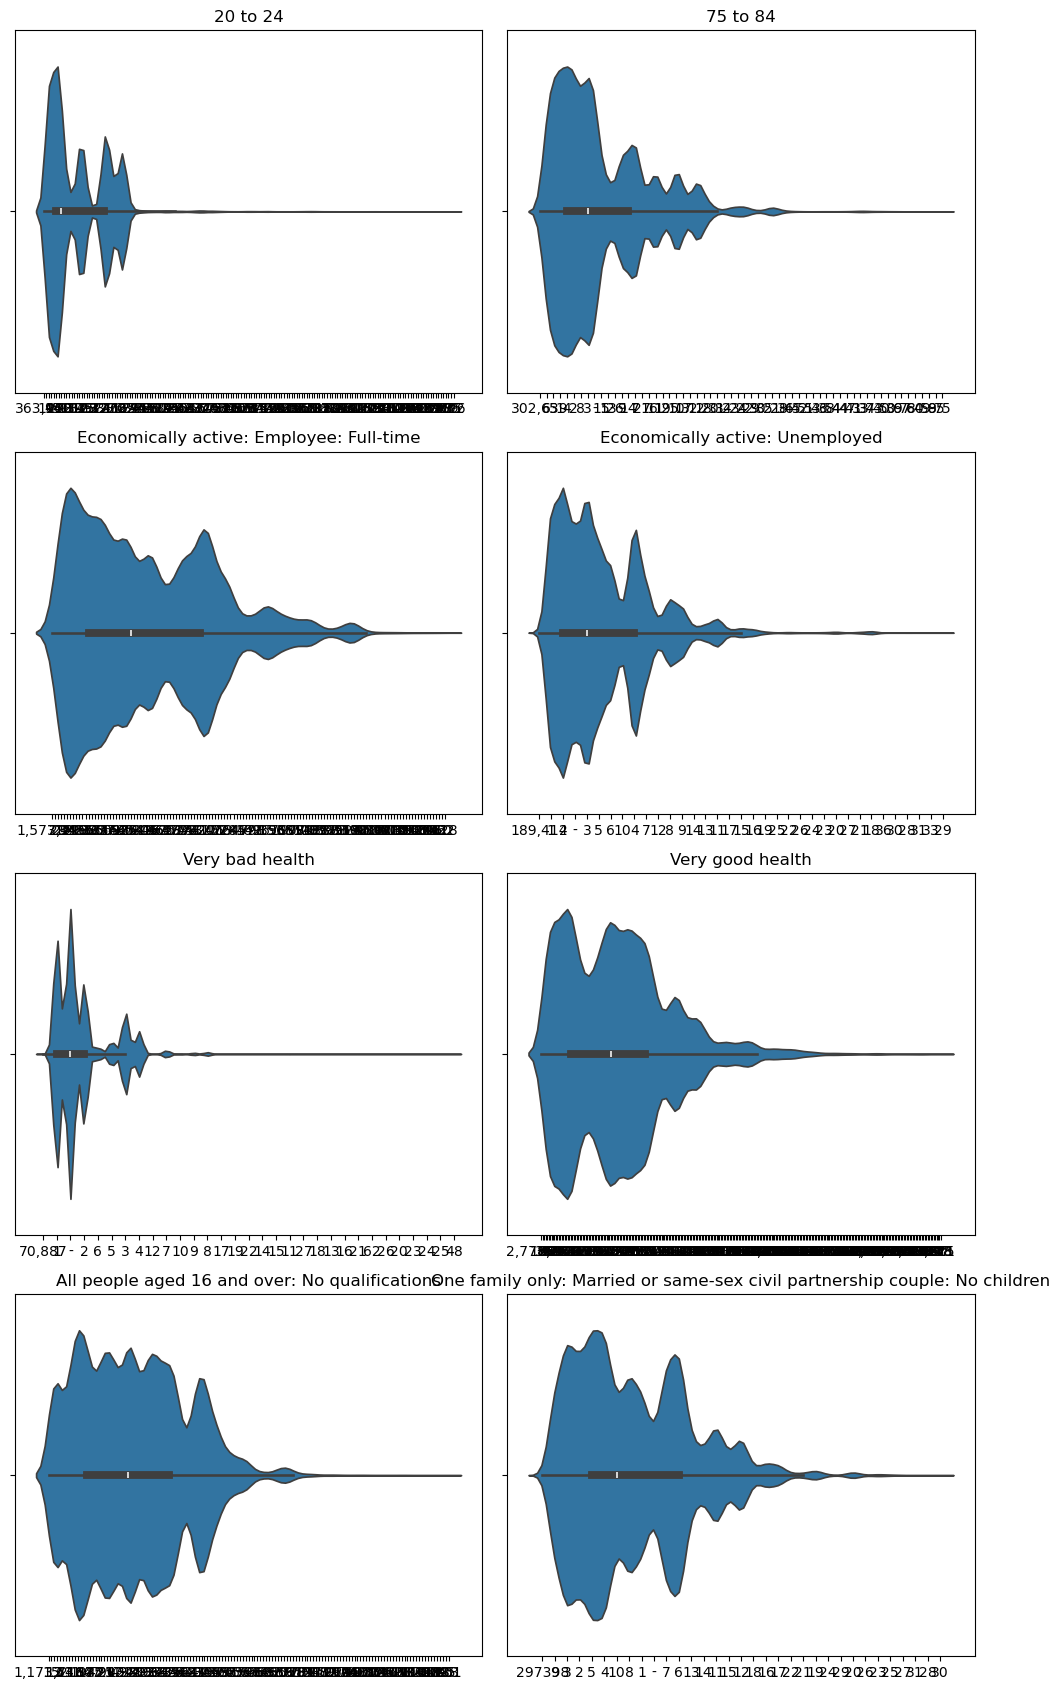

In [83]:
# violin plots

import seaborn as sns
import matplotlib.pyplot as plt

attributes_to_plot = ['20 to 24',
                      '75 to 84',
                      'Economically active: Employee: Full-time',
                      'Economically active: Unemployed',
                      'Very bad health',
                      'Very good health',
                      'All people aged 16 and over: No qualifications',
                      'One family only: Married or same-sex civil partnership couple: No children']

plt.figure(figsize=(10, 17))

for i, attribute in enumerate(attributes_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.violinplot(x=merged_data[attribute])
    plt.title(attribute)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

screenshots

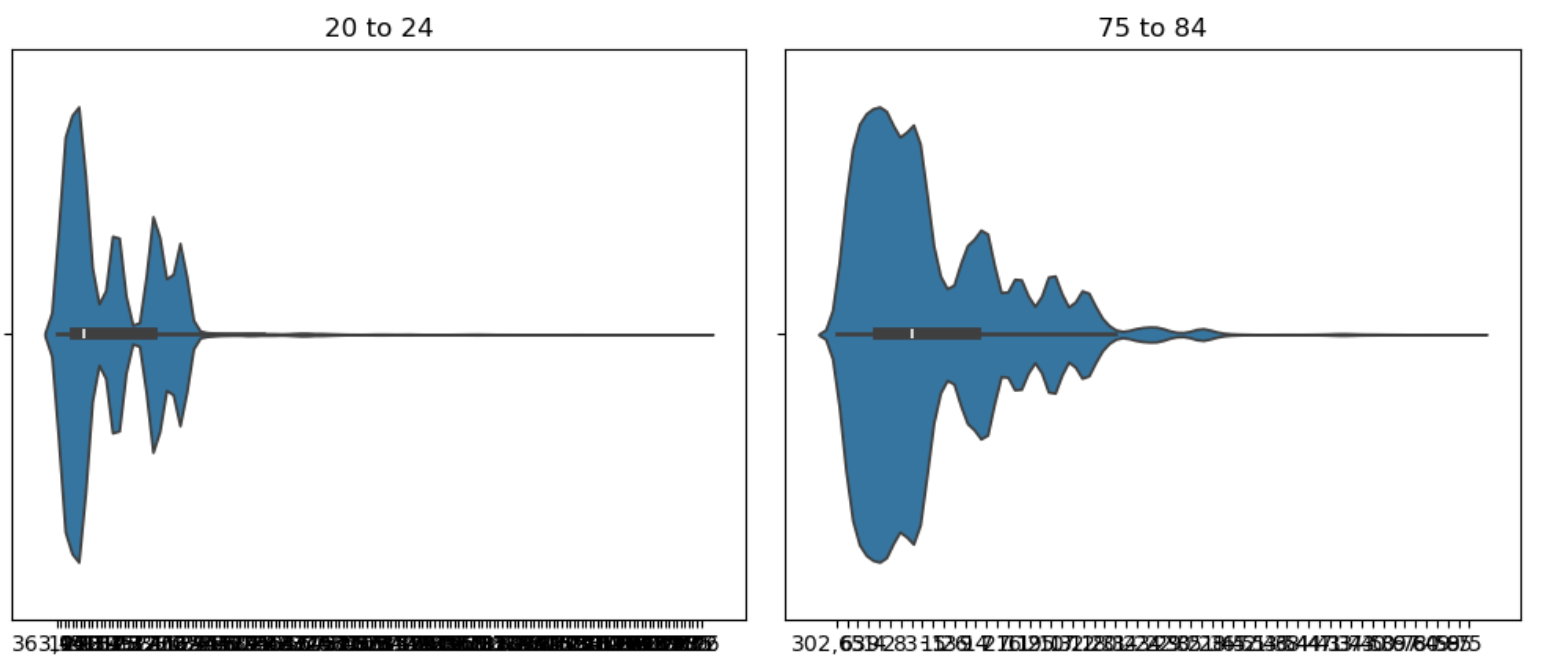
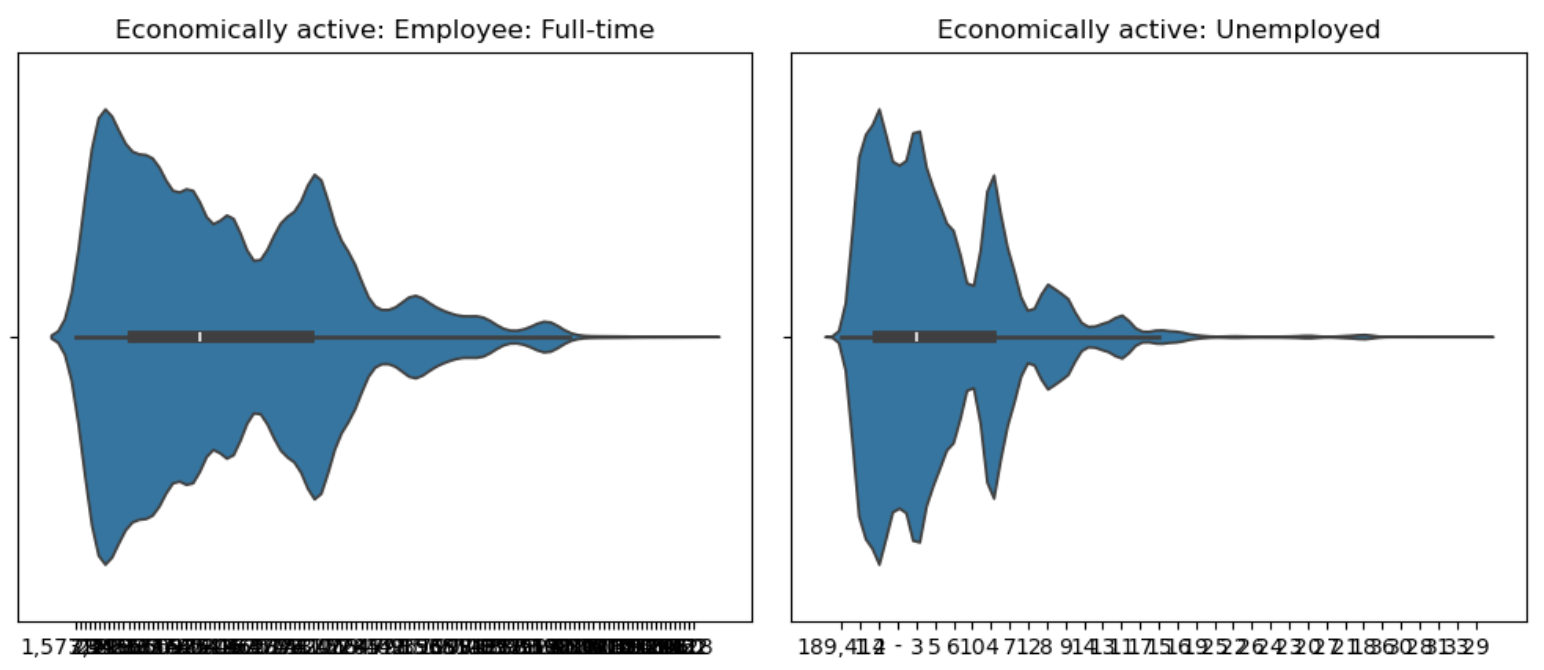
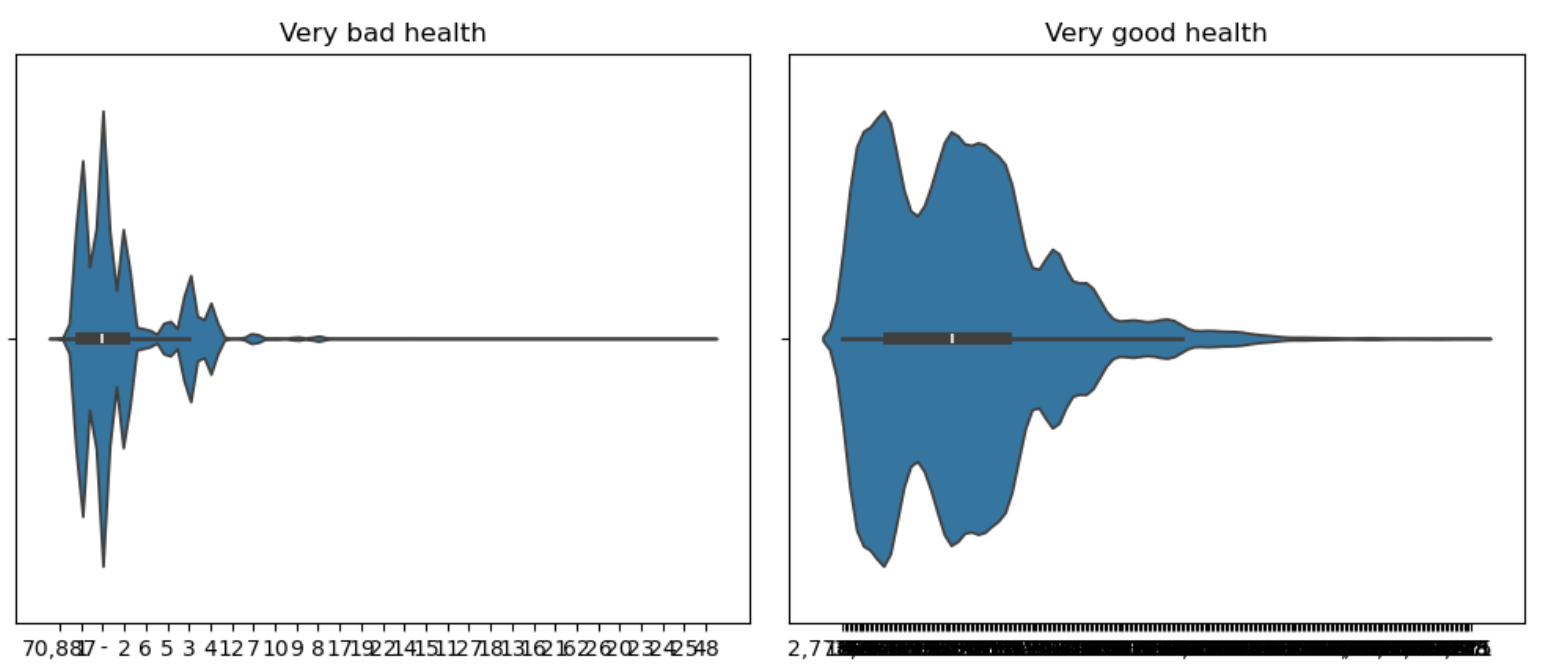
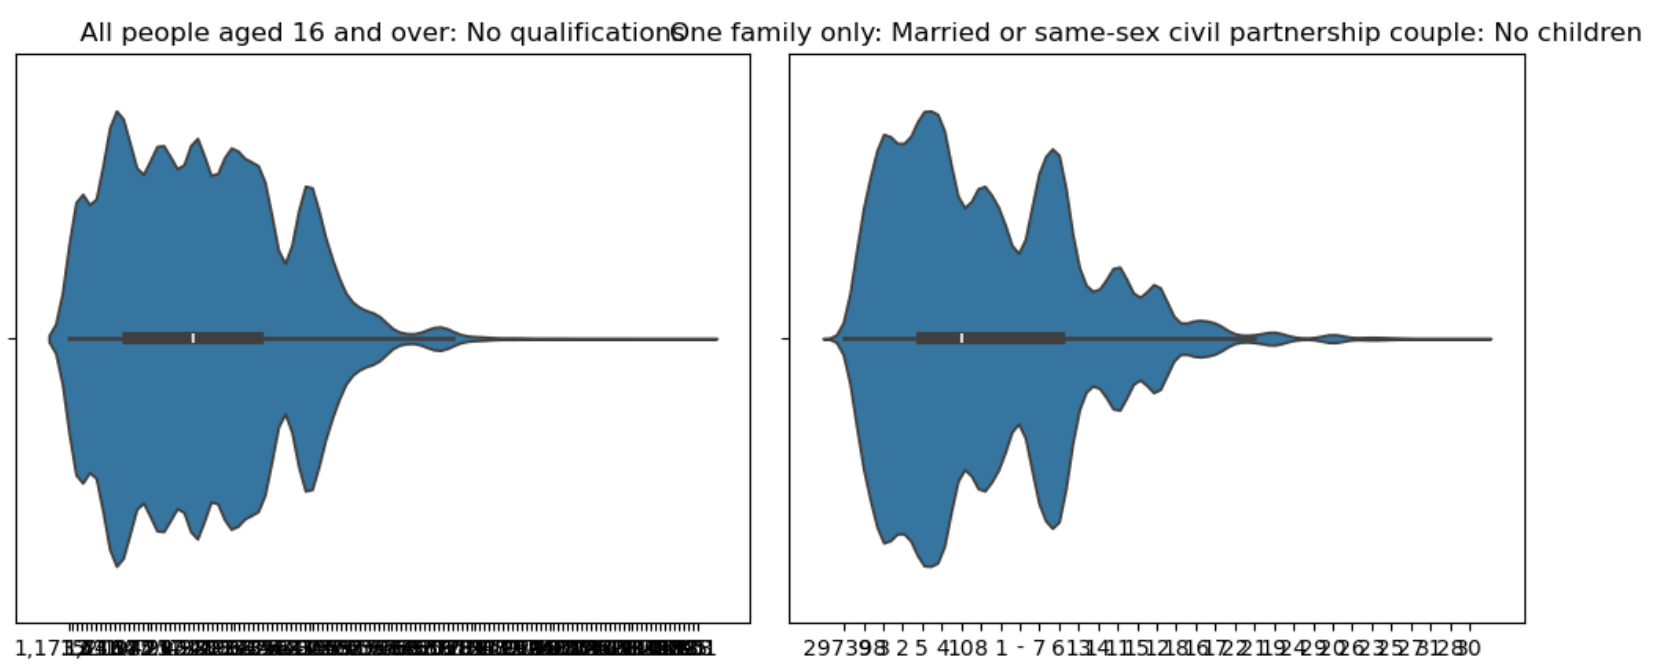

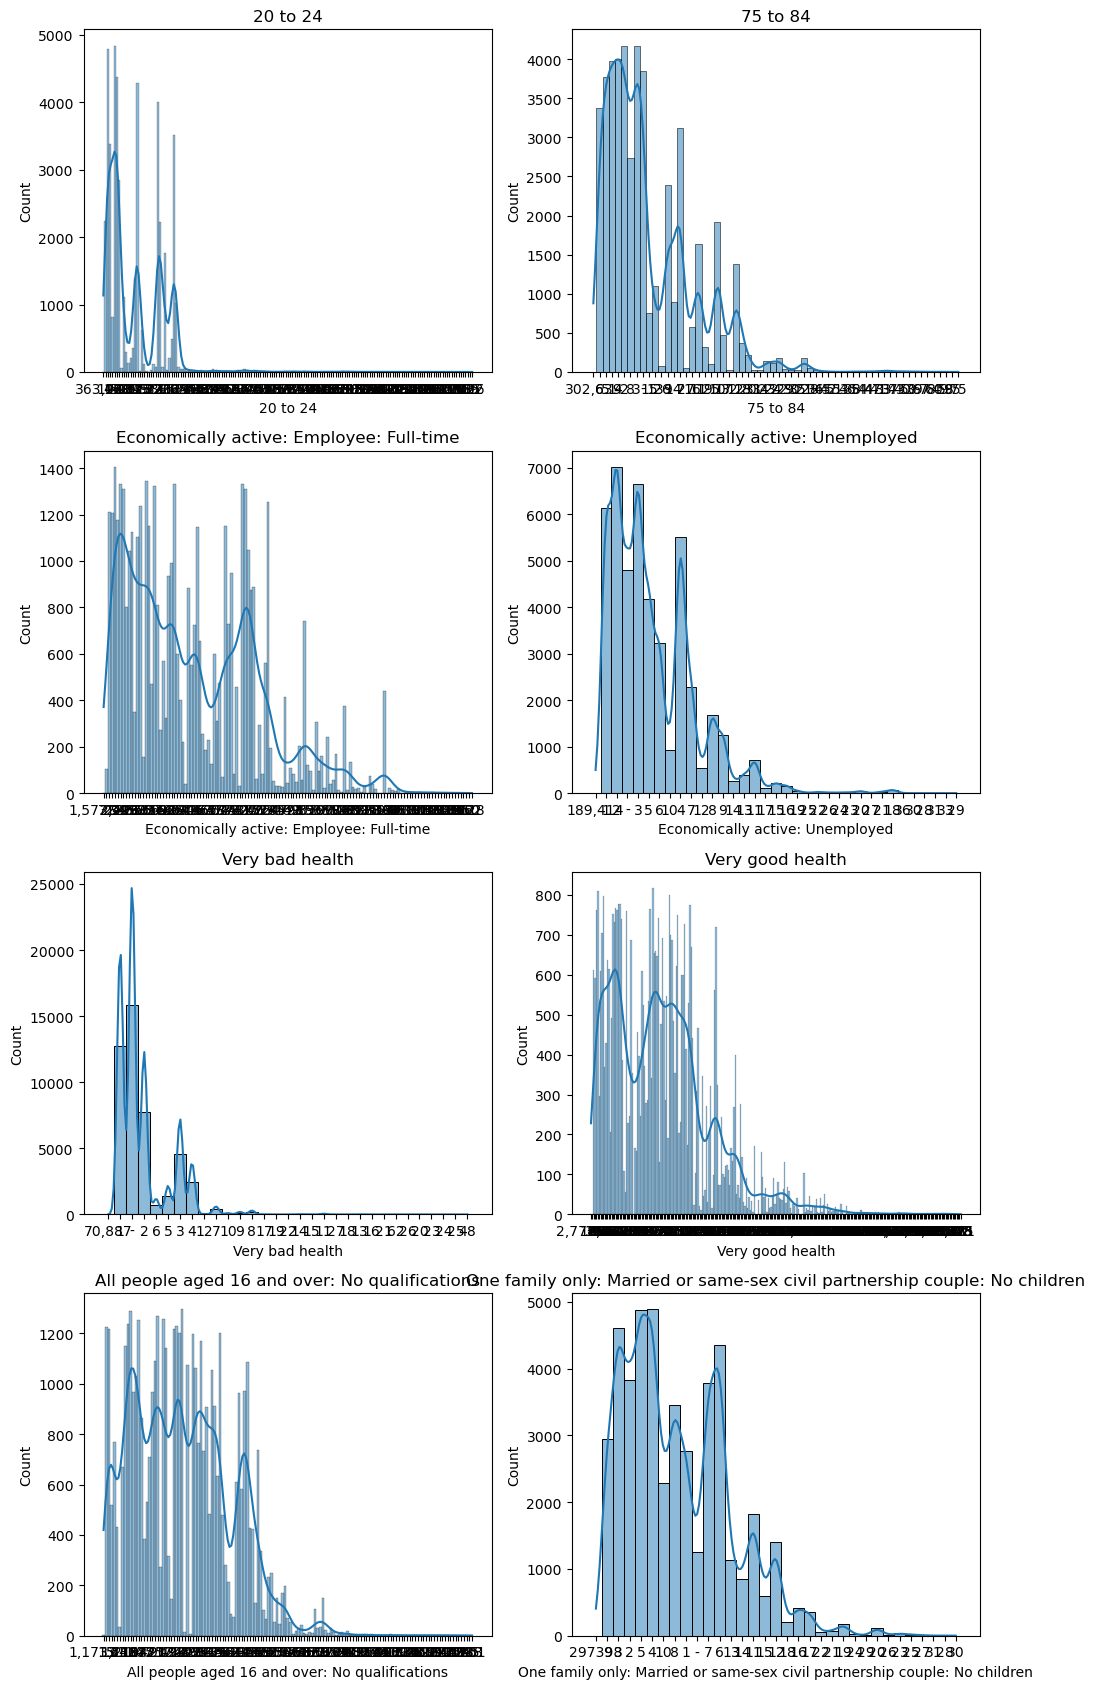

In [84]:
# histograms 

import seaborn as sns
import matplotlib.pyplot as plt

attributes_to_plot = ['20 to 24',
                      '75 to 84',
                      'Economically active: Employee: Full-time',
                      'Economically active: Unemployed',
                      'Very bad health',
                      'Very good health',
                      'All people aged 16 and over: No qualifications',
                      'One family only: Married or same-sex civil partnership couple: No children']

plt.figure(figsize=(10, 17))

for i, attribute in enumerate(attributes_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.histplot(merged_data[attribute].astype(str), kde=True)
    plt.title(attribute)

plt.tight_layout()
plt.show()

screenshots 

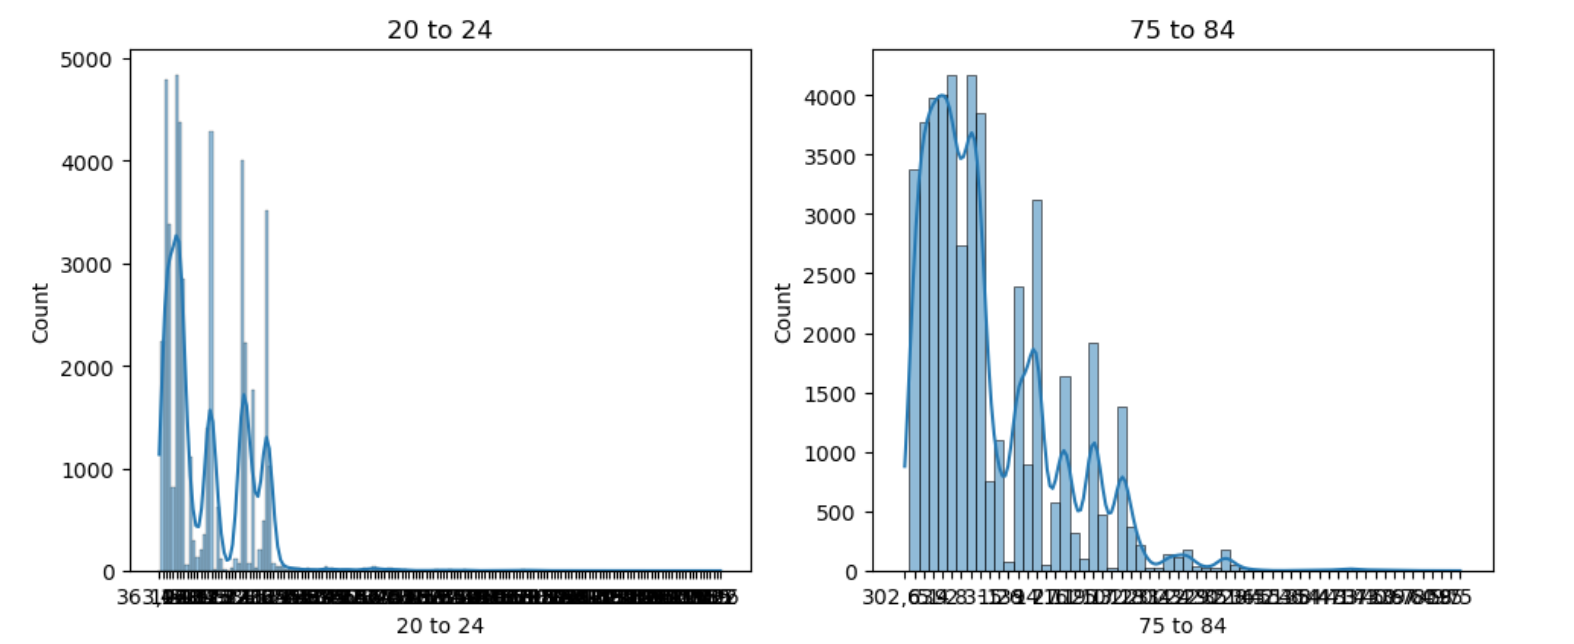
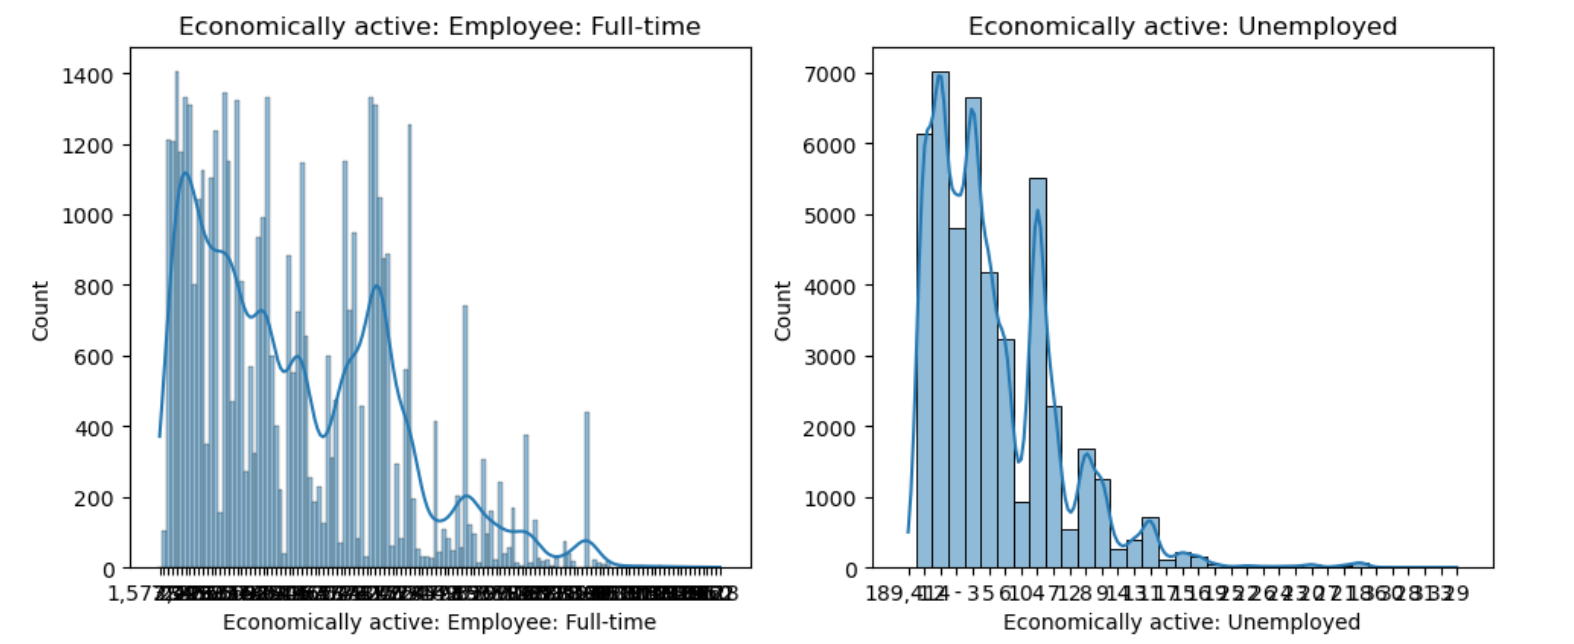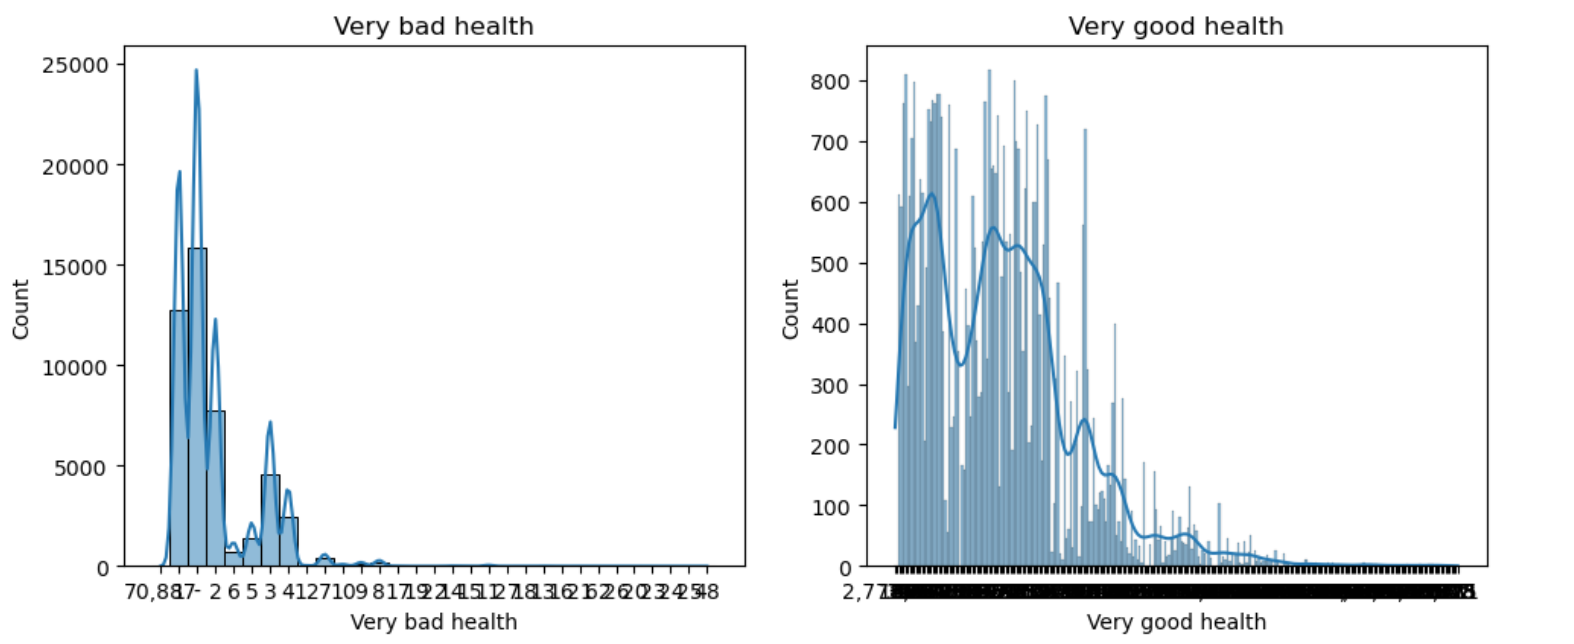
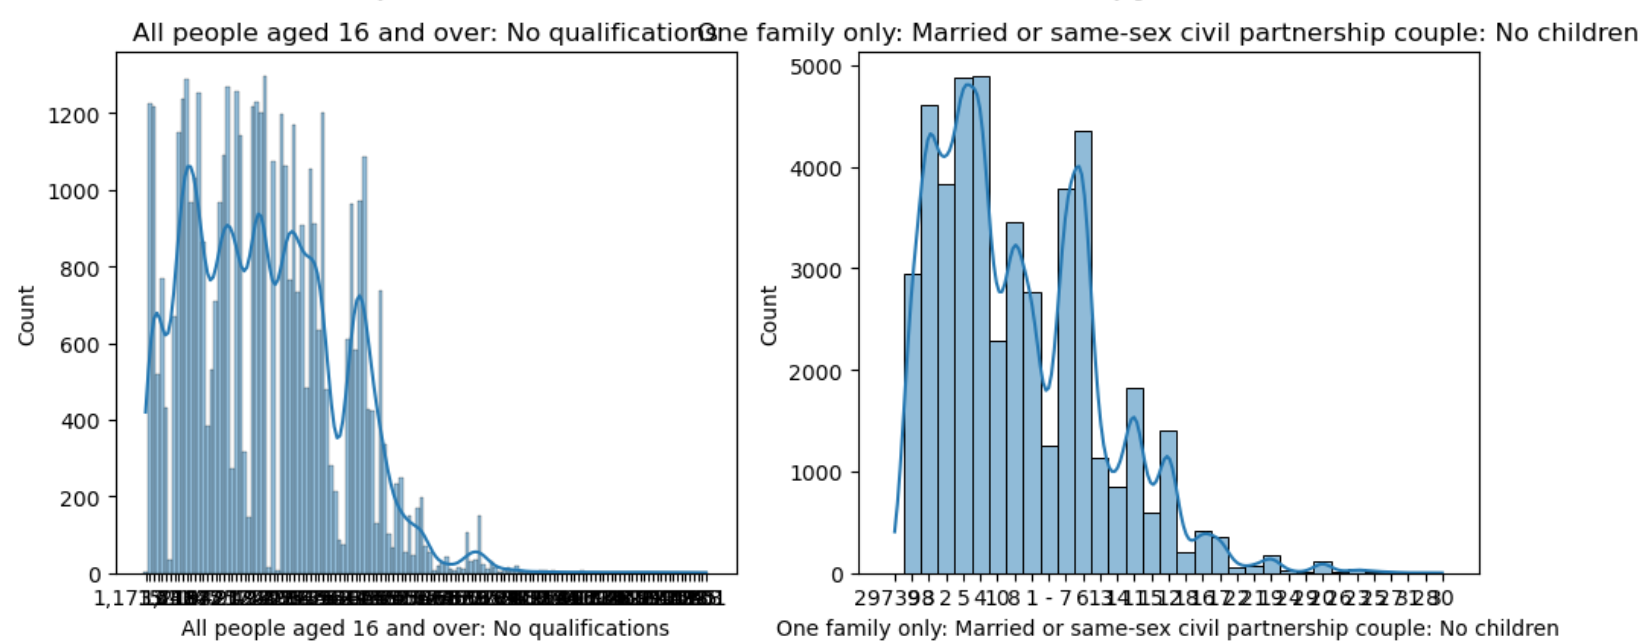



In [89]:
def calculate_percentages(dataframe, total_columns, value_columns):
    result_df = pd.DataFrame()

    for total_col, value_col in zip(total_columns, value_columns):
        percentage_col_name = f"{value_col}_percentage"

        if total_col not in dataframe.columns:
            raise ValueError(f"Total column '{total_col}' not found in the DataFrame.")
        
        # Force values to numeric (handle blanks or missing)
        dataframe[value_col] = pd.to_numeric(dataframe[value_col], errors='coerce')
        dataframe[total_col] = pd.to_numeric(dataframe[total_col], errors='coerce')
        
        result_df[percentage_col_name] = (dataframe[value_col] / dataframe[total_col]) * 100

    return result_df
    
# Totals for percentage calculation
total_cols = [
    'All people',                                 # 20 to 24
    'All people',                                 # 75 to 84
    'All people aged 16 to 74',                   # Full-time employees
    'All people aged 16 to 74',                   # Unemployed
    'All people',                                 # Very bad health
    'All people',                                 # Very good health
    'All people aged 16 and over',                # No qualifications
    'All households'                              # Household type: married, no kids
]

# Matching variables you want to convert to percentages
value_cols = [
    '20 to 24',
    '75 to 84',
    'Economically active: Employee: Full-time',
    'Economically active: Unemployed',
    'Very bad health',
    'Very good health',
    'All people aged 16 and over: No qualifications',
    'One family only: Married or same-sex civil partnership couple: No children'
]

# Run the function
result_dataframe = calculate_percentages(edi_merg, total_cols, value_cols)




In [90]:
result_dataframe.head()

20 to 24_percentage  75 to 84_percentage  \
0             3.750000             5.000000   
1             2.985075             3.731343   
2             1.388889            20.833333   
3             3.846154             2.884615   
4                  NaN             3.448276   

   Economically active: Employee: Full-time_percentage  \
0                                          52.459016     
1                                          37.755102     
2                                          38.235294     
3                                          28.235294     
4                                          62.500000     

   Economically active: Unemployed_percentage  Very bad health_percentage  \
0                                         NaN                         NaN   
1                                    2.040816                         NaN   
2                                         NaN                    1.388889   
3                                         NaN                    1.923077   
4                                    2.777778                    1.149425   

   Very good health_percentage  \
0                    61.250000   
1                    45.522388   
2                    41.666667   
3                    56.730769   
4                    72.413793   

   All people aged 16 and over: No qualifications_percentage  \
0                                          14.925373           
1                                          40.952381           
2                                          31.343284           
3                                           4.444444           
4                                           2.666667           

   One family only: Married or same-sex civil partnership couple: No children_percentage  
0                                          11.428571                                      
1                                          18.000000                                      
2                                           6.666667                                      
3                                          37.777778                                      
4                                          13.043478

In [91]:
result_dataframe.shape

(4322, 8)

In [93]:
concatenated_df = pd.concat([edi_merg, result_dataframe], axis=1, ignore_index=False)
concatenated_df.head()

OBJECTID    oa_code  HHcount  Popcount    council      sqkm       hect  \
0      7307  S00104290       35        80  S12000036  0.005849   0.584871   
1      7308  S00105247       50       134  S12000036  0.015458   1.545845   
2      7309  S00107429       45        72  S12000036  0.012086   1.208595   
3      7310  S00105740       45       104  S12000036  0.372084  37.208371   
4      7311  S00105450       46        87  S12000036  0.021571   2.157070   

   masterpc easting northing  ...  \
0   EH6 8AJ  327509   675739  ...   
1  EH11 3UN  319980   671252  ...   
2  EH14 1DD  322954   670960  ...   
3  EH14 1DN  322537   669850  ...   
4  EH12 6AN  323001   673215  ...   

  All people aged 16 and over: No qualifications_percentage  \
0                                          14.925373          
1                                          40.952381          
2                                          31.343284          
3                                           4.444444          
4                                           2.666667          

  One family only: Married or same-sex civil partnership couple: No children_percentage  \
0                                          11.428571                                      
1                                          18.000000                                      
2                                           6.666667                                      
3                                          37.777778                                      
4                                          13.043478                                      

  20 to 24_percentage 75 to 84_percentage  \
0            3.750000            5.000000   
1            2.985075            3.731343   
2            1.388889           20.833333   
3            3.846154            2.884615   
4                 NaN            3.448276   

   Economically active: Employee: Full-time_percentage  \
0                                          52.459016     
1                                          37.755102     
2                                          38.235294     
3                                          28.235294     
4                                          62.500000     

   Economically active: Unemployed_percentage Very bad health_percentage  \
0                                         NaN                        NaN   
1                                    2.040816                        NaN   
2                                         NaN                   1.388889   
3                                         NaN                   1.923077   
4                                    2.777778                   1.149425   

  Very good health_percentage  \
0                   61.250000   
1                   45.522388   
2                   41.666667   
3                   56.730769   
4                   72.413793   

  All people aged 16 and over: No qualifications_percentage  \
0                                          14.925373          
1                                          40.952381          
2                                          31.343284          
3                                           4.444444          
4                                           2.666667          

  One family only: Married or same-sex civil partnership couple: No children_percentage  
0                                          11.428571                                     
1                                          18.000000                                     
2                                           6.666667                                     
3                                          37.777778                                     
4                                          13.043478                                     

[5 rows x 137 columns]

In [94]:
concatenated_df.shape

(4322, 137)

In [95]:
list(concatenated_df.columns)

['OBJECTID',
 'oa_code',
 'HHcount',
 'Popcount',
 'council',
 'sqkm',
 'hect',
 'masterpc',
 'easting',
 'northing',
 'SHAPE_1_Le',
 'SHAPE_1_Ar',
 'DataZone',
 'geometry',
 'All people aged 16 and over',
 'All people aged 16 and over: No qualifications',
 'All people aged 16 and over: Level 1',
 'All people aged 16 and over: Level 2',
 'All people aged 16 and over: Level 3',
 'All people aged 16 and over: Level 4 and above',
 'All people',
 '0 to 4',
 '5 to 7',
 '8 to 9',
 '10 to 14',
 '15',
 '16 to 17',
 '18 to 19',
 '20 to 24',
 '25 to 29',
 '30 to 44',
 '45 to 59',
 '60 to 64',
 '65 to 74',
 '75 to 84',
 '85 to 89',
 '90 and over',
 'Mean age',
 'Median age',
 'Church of Scotland',
 'Roman Catholic',
 'Other Christian',
 'Buddhist',
 'Hindu',
 'Jewish',
 'Muslim',
 'Sikh',
 'Other religion',
 'No religion',
 'Religion not stated',
 'Single (never married or never registered a same-sex civil partnership)',
 'Married',
 'In a registered same-sex civil partnership',
 'Separated (but 

In [98]:
keep_cols= ['oa_code',
    'Popcount',
    'HHcount',
    'DataZone',
    'geometry',
    '20 to 24',
    '75 to 84',
    'Economically active: Employee: Full-time',
    'Economically active: Unemployed',
    'Very bad health',
    'Very good health',
    'All people aged 16 and over: No qualifications',
    'One family only: Married or same-sex civil partnership couple: No children'
]

edi_census_data = concatenated_df[keep_cols]

In [99]:
edi_census_data.head()

oa_code  Popcount  HHcount   DataZone  \
0  S00104290        80       35  S01008792   
1  S00105247       134       50  S01008468   
2  S00107429        72       45  S01008509   
3  S00105740       104       45  S01008511   
4  S00105450        87       46  S01008873   

                                            geometry  20 to 24  75 to 84  \
0  POLYGON ((327555.000 675752.000, 327536.846 67...       3.0       4.0   
1  POLYGON ((319915.000 671377.000, 319937.954 67...       4.0       5.0   
2  POLYGON ((323024.000 671021.000, 323009.001 67...       1.0      15.0   
3  POLYGON ((322653.000 670327.000, 322674.000 67...       4.0       3.0   
4  POLYGON ((323089.000 673352.000, 323112.000 67...       NaN       3.0   

   Economically active: Employee: Full-time  Economically active: Unemployed  \
0                                      32.0                              NaN   
1                                      37.0                              2.0   
2                                      13.0                              NaN   
3                                      24.0                              NaN   
4                                      45.0                              2.0   

   Very bad health  Very good health  \
0              NaN              49.0   
1              NaN              61.0   
2              1.0              30.0   
3              2.0              59.0   
4              1.0              63.0   

   All people aged 16 and over: No qualifications  \
0                                            10.0   
1                                            43.0   
2                                            21.0   
3                                             4.0   
4                                             2.0   

   One family only: Married or same-sex civil partnership couple: No children  
0                                                4.0                           
1                                                9.0                           
2                                                3.0                           
3                                               17.0                           
4                                                6.0

In [100]:
# standarisation

numeric_columns = edi_census_data.select_dtypes(include='float64')
z_score_df = (numeric_columns - numeric_columns.mean()) / numeric_columns.std(ddof=0)
z_score_df.head()

20 to 24  75 to 84  Economically active: Employee: Full-time  \
0 -0.453793 -0.441868                                 -0.178754   
1 -0.399120 -0.263595                                  0.169581   
2 -0.563140  1.519135                                 -1.502428   
3 -0.399120 -0.620141                                 -0.736090   
4       NaN -0.620141                                  0.726918   

   Economically active: Unemployed  Very bad health  Very good health  \
0                              NaN              NaN         -0.499060   
1                        -0.626438              NaN         -0.070777   
2                              NaN        -0.623238         -1.177173   
3                              NaN        -0.027389         -0.142158   
4                        -0.626438        -0.623238          0.000603   

   All people aged 16 and over: No qualifications  \
0                                       -0.468839   
1                                        1.996119   
2                                        0.352813   
3                                       -0.917013   
4                                       -1.066405   

   One family only: Married or same-sex civil partnership couple: No children  
0                                          -0.497067                           
1                                           0.942970                           
2                                          -0.785075                           
3                                           3.247029                           
4                                           0.078948

In [101]:
corr = z_score_df.corr()
corr.style.background_gradient(cmap='coolwarm')

screenshot

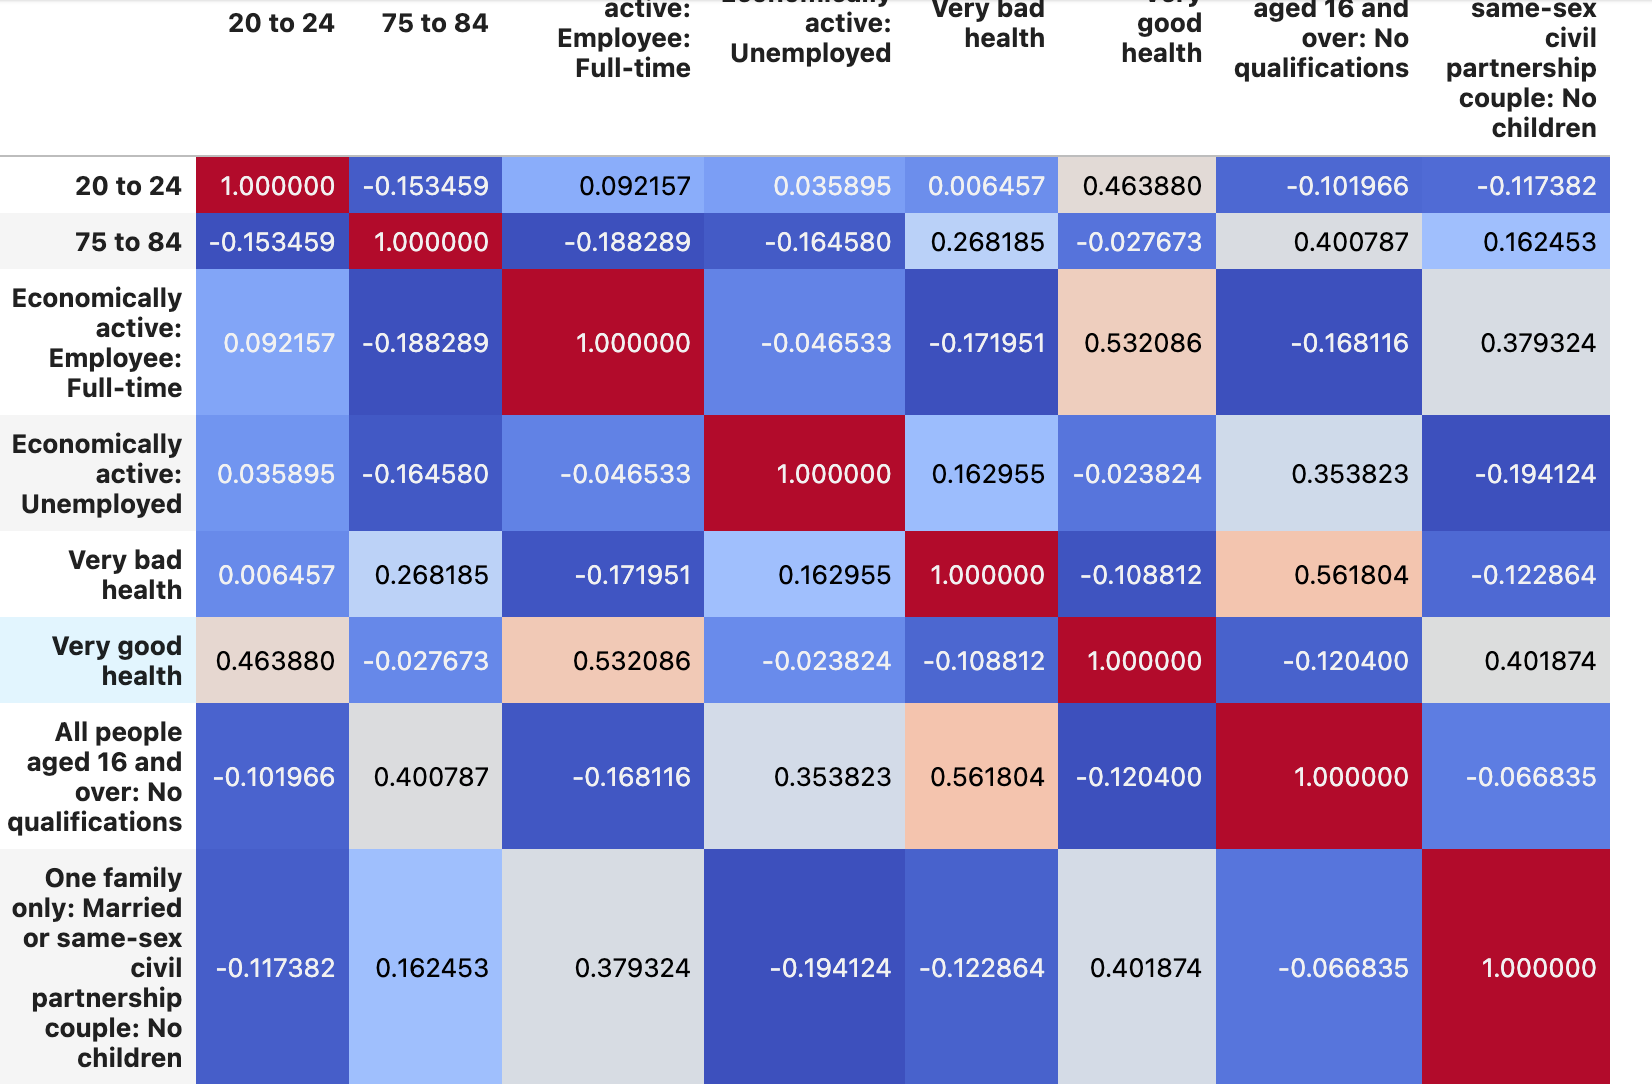

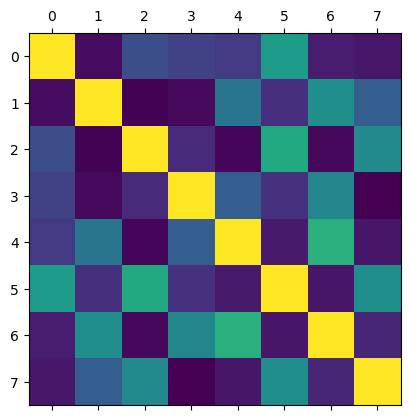

In [102]:
import matplotlib.pyplot as plt

plt.matshow(z_score_df.corr())
plt.show()

screenshot

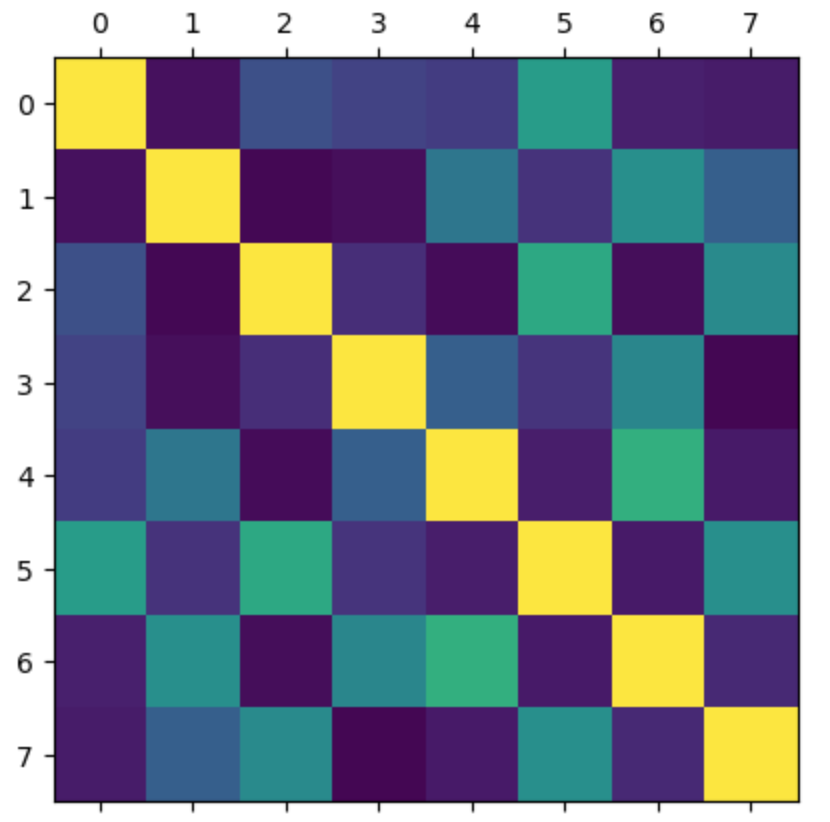

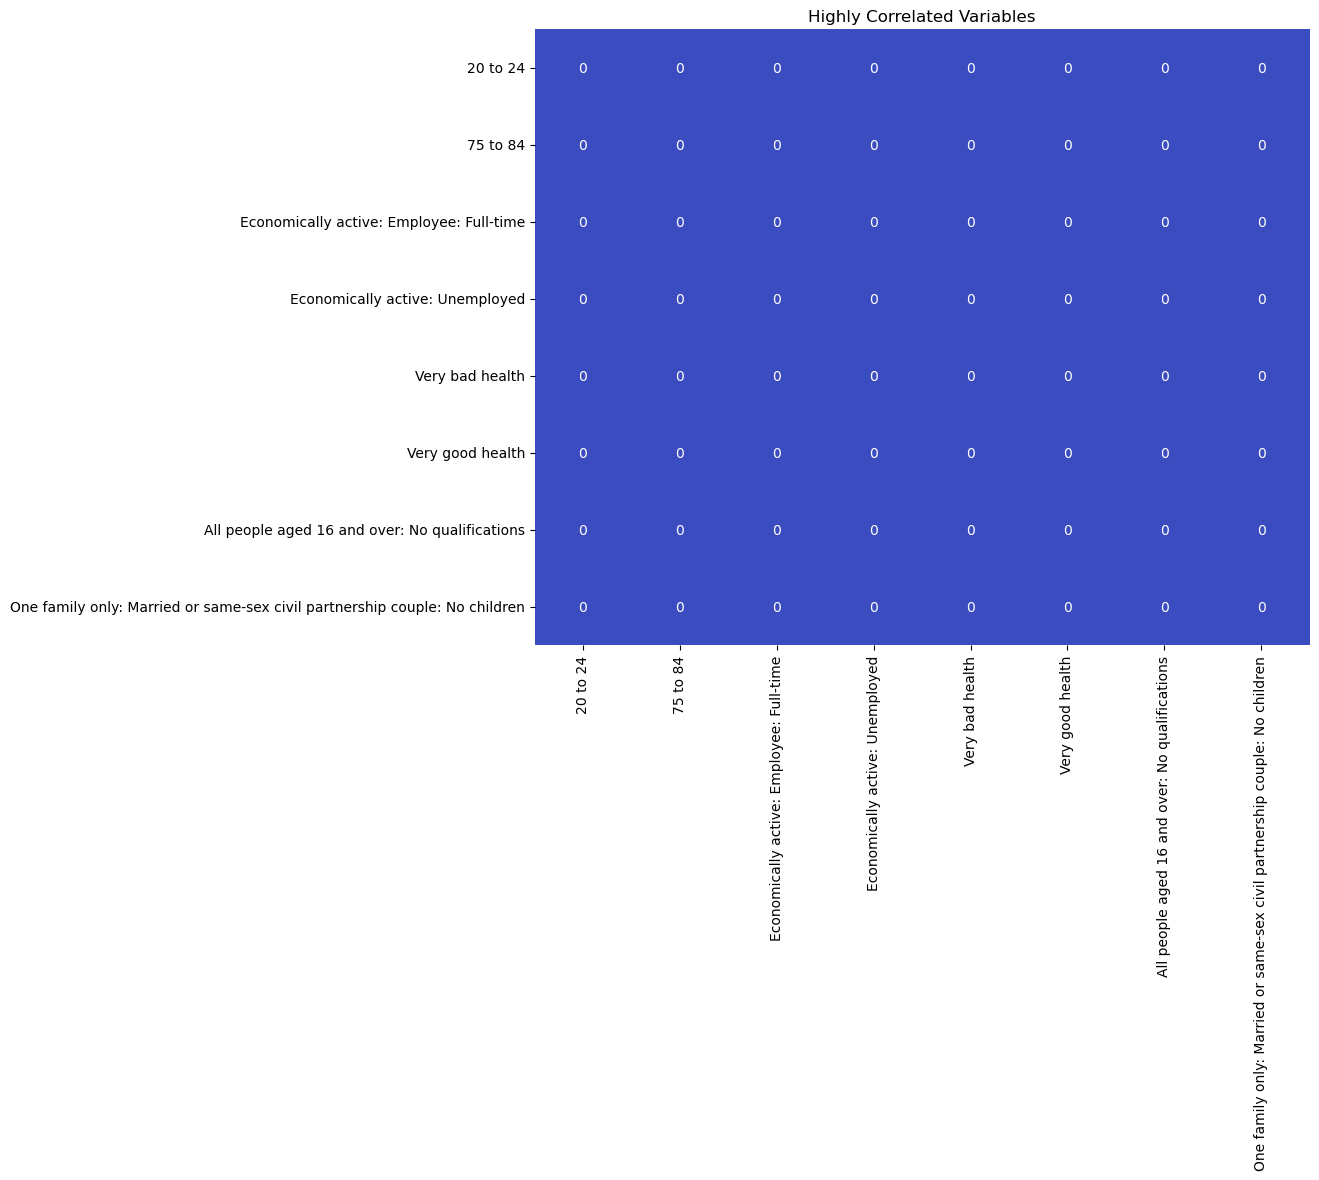

In [103]:
threshold = 0.7 
highly_correlated = (corr.abs() > threshold) & (corr.abs() < 1.0)

plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated, cmap='coolwarm', cbar=False, annot=True)

plt.title('Highly Correlated Variables')
plt.show()

# there are no highly correlated varaiables so therefore no data needs to be removed

screenshot

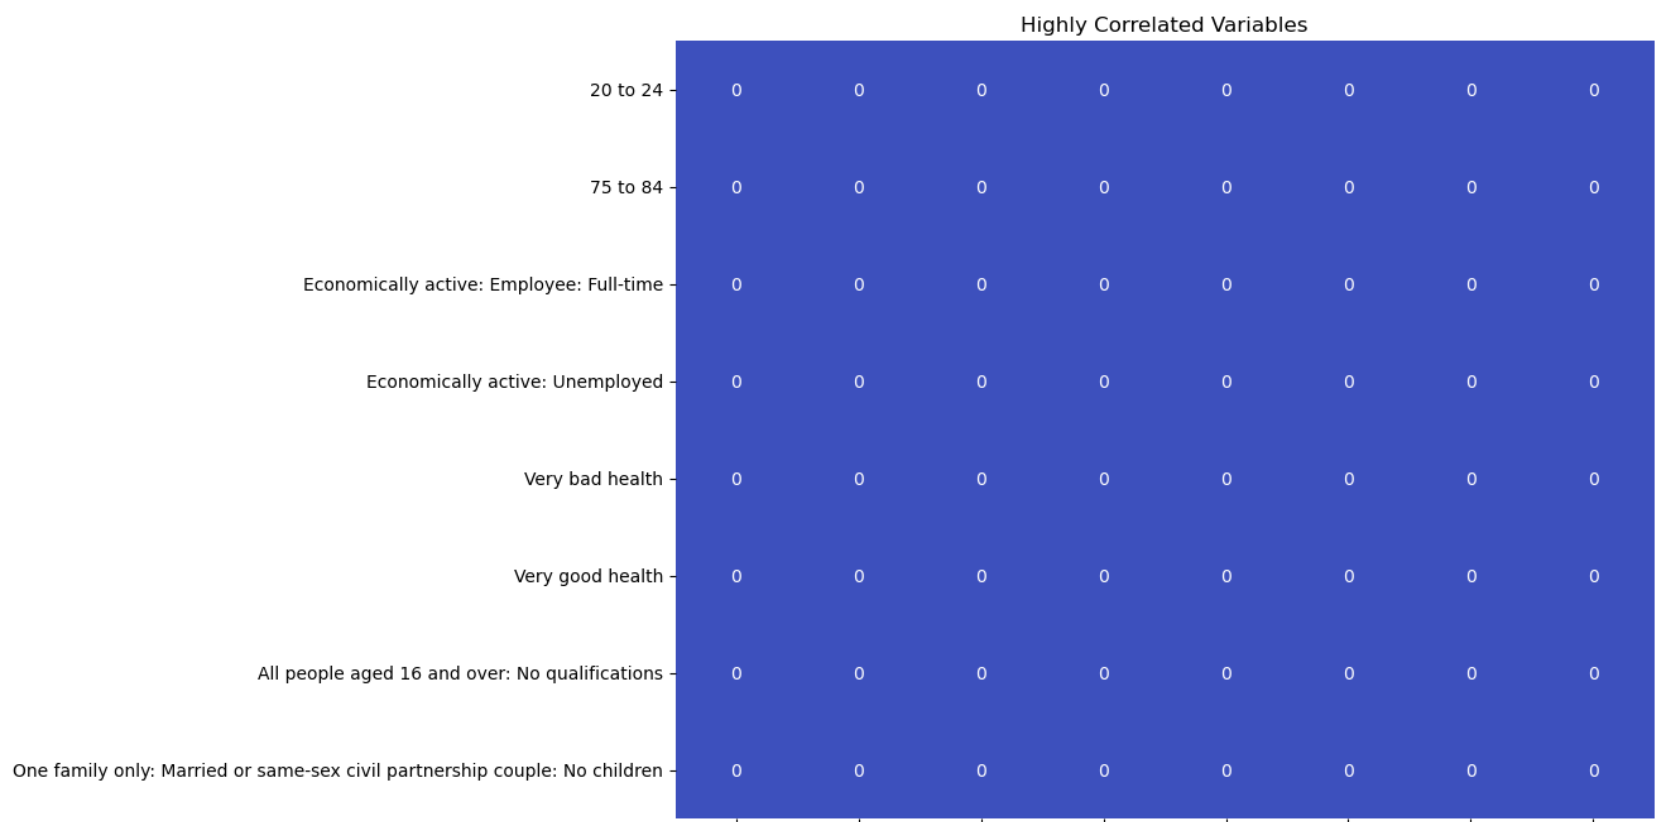

In [108]:
# removing nan values 

z_score_df.isna().sum()

20 to 24                                                                        90
75 to 84                                                                       536
Economically active: Employee: Full-time                                         8
Economically active: Unemployed                                                551
Very bad health                                                               2016
Very good health                                                                 2
All people aged 16 and over: No qualifications                                  64
One family only: Married or same-sex civil partnership couple: No children     134
dtype: int64

I have quite a few missing nan values so I think its best to impute the missing values then recalculate the z scores to avoid skewing the data too much. To do this i will use the median for this as there are so many missing values.  

In [110]:
numeric_columns = edi_census_data.select_dtypes(include='float64')
numeric_columns.fillna(z_score_df.median(), inplace=True)

In [111]:
numeric_columns

20 to 24   75 to 84  Economically active: Employee: Full-time  \
0       3.0000   4.000000                                      32.0   
1       4.0000   5.000000                                      37.0   
2       1.0000  15.000000                                      13.0   
3       4.0000   3.000000                                      24.0   
4      -0.2351   3.000000                                      45.0   
...        ...        ...                                       ...   
4317    4.0000   3.000000                                      19.0   
4318   10.0000  -0.263595                                      24.0   
4319   13.0000   6.000000                                      26.0   
4320   45.0000   1.000000                                      14.0   
4321    6.0000   3.000000                                      16.0   

      Economically active: Unemployed  Very bad health  Very good health  \
0                           -0.287757        -0.623238              49.0   
1                            2.000000        -0.623238              61.0   
2                           -0.287757         1.000000              30.0   
3                           -0.287757         2.000000              59.0   
4                            2.000000         1.000000              63.0   
...                               ...              ...               ...   
4317                         1.000000        -0.623238              22.0   
4318                         3.000000         2.000000              43.0   
4319                        -0.287757        -0.623238              46.0   
4320                         2.000000        -0.623238              53.0   
4321                         4.000000         1.000000              26.0   

      All people aged 16 and over: No qualifications  \
0                                               10.0   
1                                               43.0   
2                                               21.0   
3                                                4.0   
4                                                2.0   
...                                              ...   
4317                                            10.0   
4318                                             6.0   
4319                                             5.0   
4320                                            11.0   
4321                                            16.0   

      One family only: Married or same-sex civil partnership couple: No children  
0                                                   4.0                           
1                                                   9.0                           
2                                                   3.0                           
3                                                  17.0                           
4                                                   6.0                           
...                                                 ...                           
4317                                                3.0                           
4318                                                4.0                           
4319                                                6.0                           
4320                                                2.0                           
4321                                                2.0                           

[4322 rows x 8 columns]

In [112]:
z_score_df = (numeric_columns - numeric_columns.mean()) / numeric_columns.std(ddof=0)
z_score_df.head()

20 to 24  75 to 84  Economically active: Employee: Full-time  \
0 -0.443488 -0.288101                                 -0.173509   
1 -0.388464 -0.112693                                  0.173281   
2 -0.553537  1.641391                                 -1.491312   
3 -0.388464 -0.463510                                 -0.728374   
4 -0.621497 -0.463510                                  0.728145   

   Economically active: Unemployed  Very bad health  Very good health  \
0                        -1.170557        -0.786842         -0.497548   
1                        -0.428729        -0.786842         -0.069669   
2                        -1.170557         0.109994         -1.175024   
3                        -1.170557         0.662493         -0.140982   
4                        -0.428729         0.109994          0.001644   

   All people aged 16 and over: No qualifications  \
0                                       -0.448905   
1                                        2.006971   
2                                        0.369720   
3                                       -0.895428   
4                                       -1.044269   

   One family only: Married or same-sex civil partnership couple: No children  
0                                          -0.431978                           
1                                           0.968843                           
2                                          -0.712143                           
3                                           3.210157                           
4                                           0.128350

In [113]:
corr = z_score_df.corr()
corr.style.background_gradient(cmap='coolwarm')

screenshot
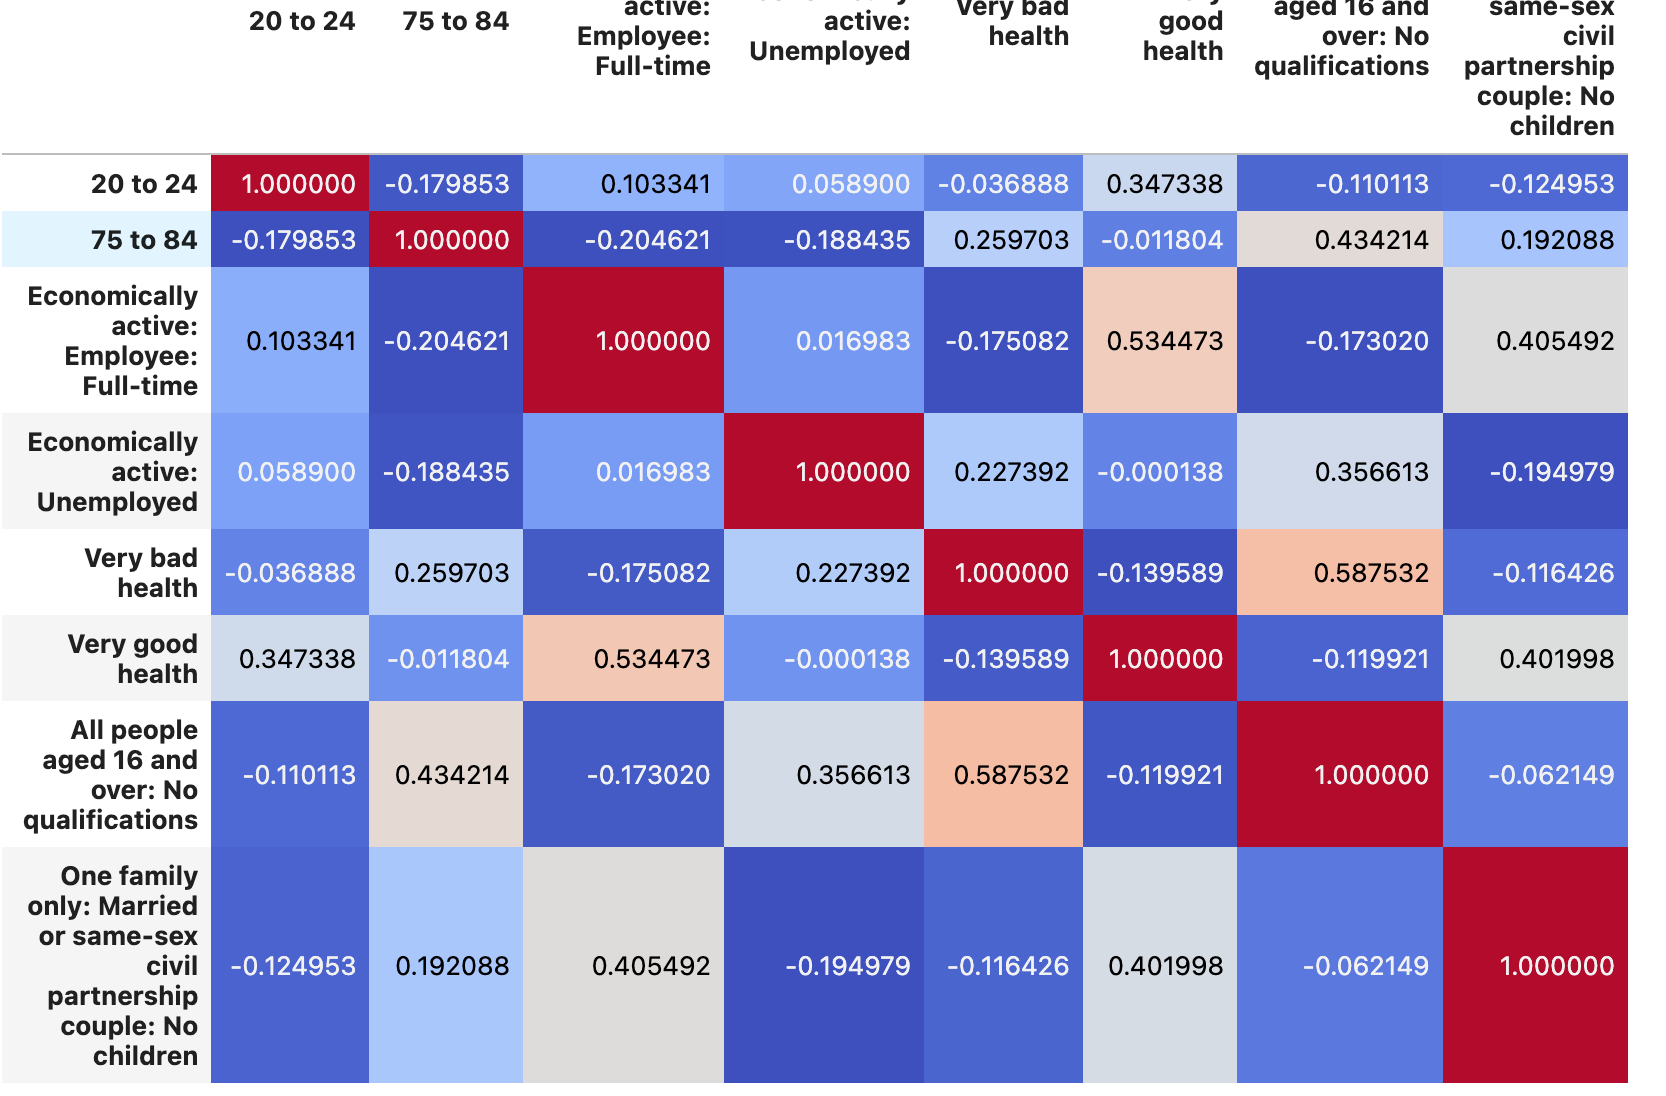

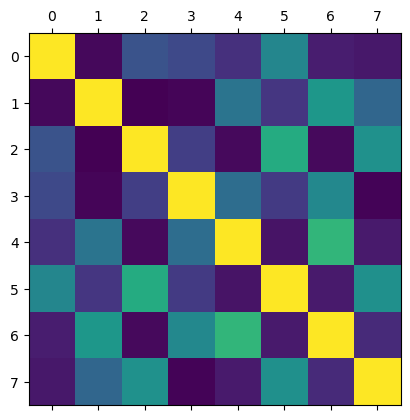

In [114]:
import matplotlib.pyplot as plt

plt.matshow(z_score_df.corr())
plt.show()

screenshot
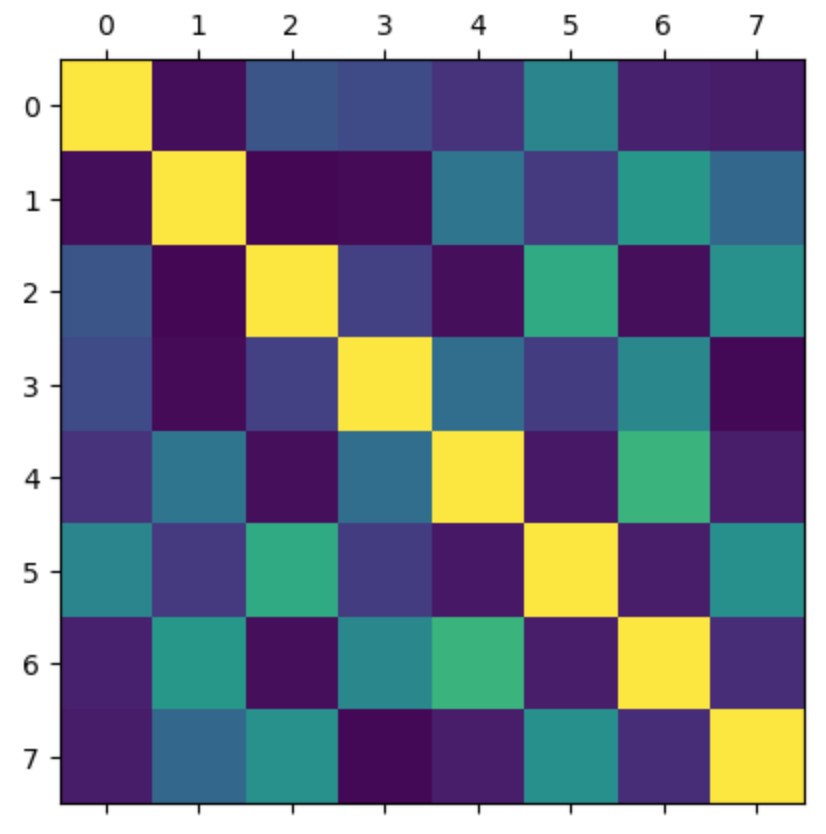

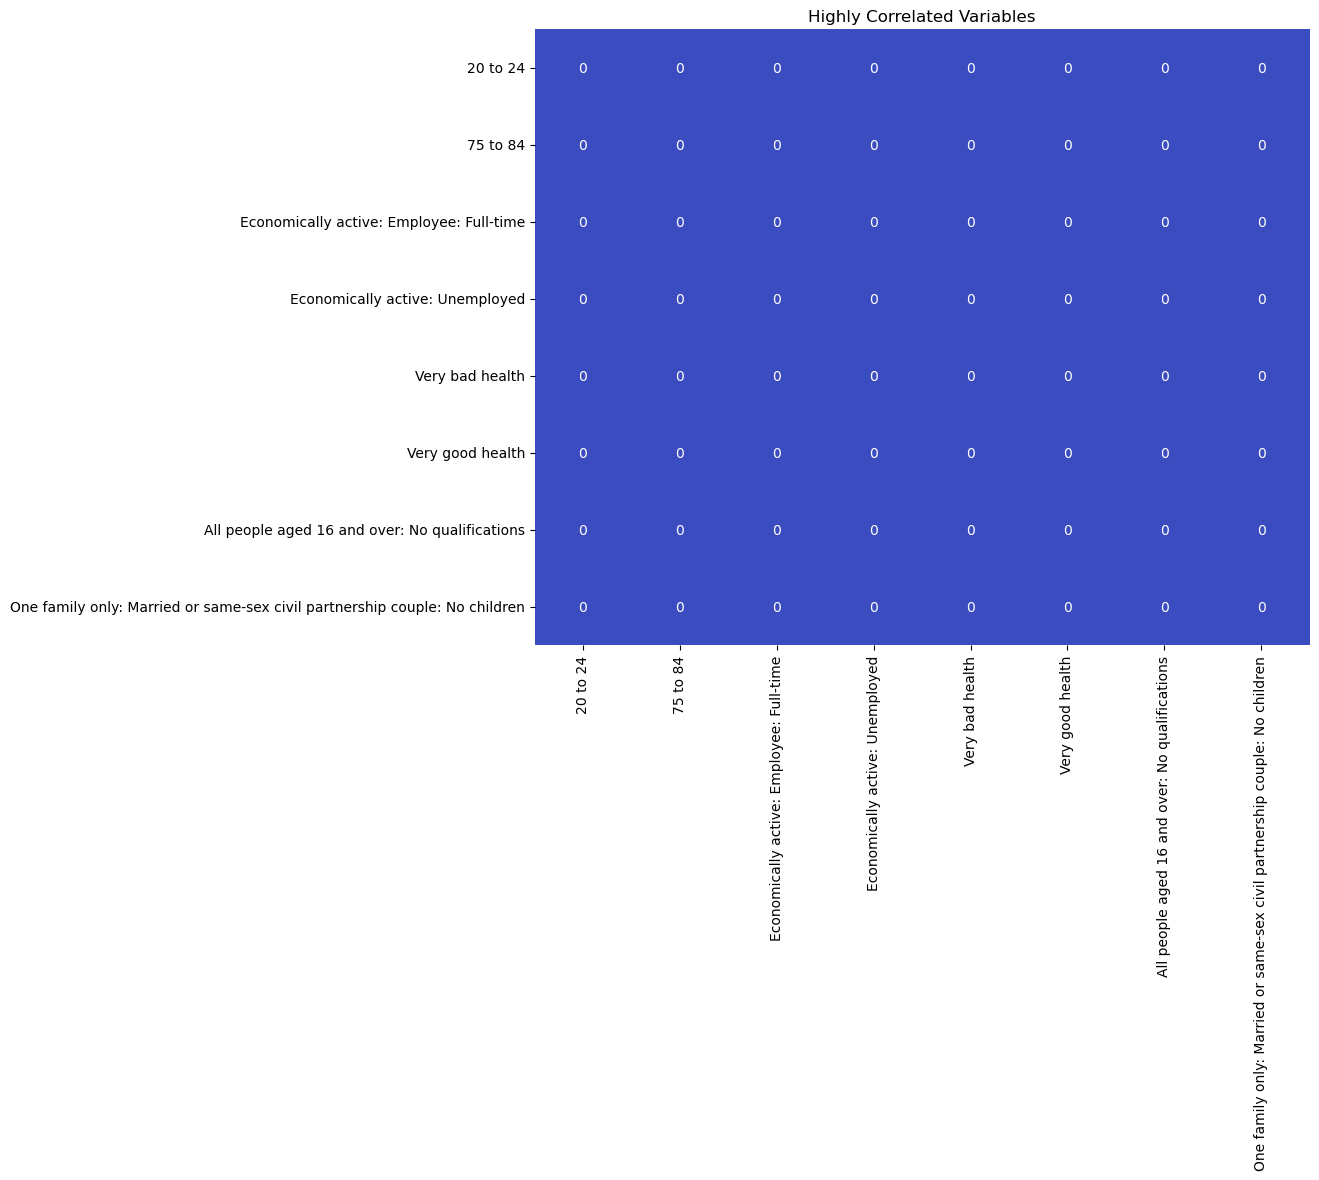

In [115]:
threshold = 0.7 
highly_correlated = (corr.abs() > threshold) & (corr.abs() < 1.0)

plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated, cmap='coolwarm', cbar=False, annot=True)

plt.title('Highly Correlated Variables')
plt.show()

# once again there are no highly correlated variables so nothing needs to be removed so can move on

screenshot
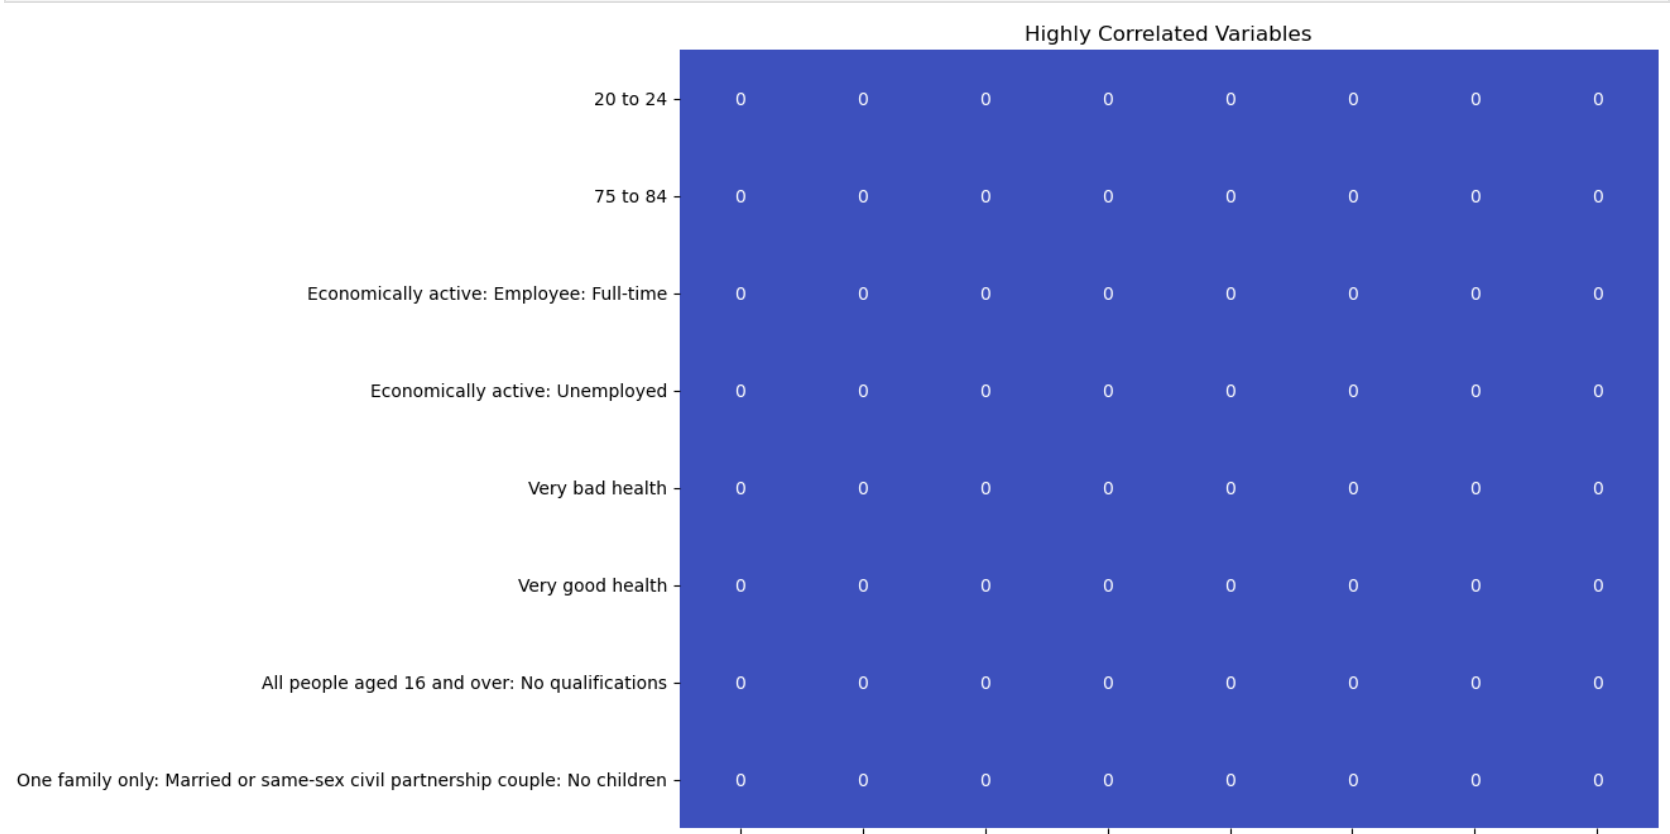

In [117]:
# double checking there are no nan values 

contains_nan = z_score_df.isna().any().any()

if contains_nan:
    print("NaN values.")
else:
    print("no NaN values")

no NaN values
